In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import os


In [58]:
import glob
print(glob.glob("C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire/*.txt"))

['C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2001.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2002.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2003.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2004.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2005.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2006.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2007.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2008.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2009.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\201.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire\\2010.txt', 'C:/Users/hedi/Desktop/factory619 internship/satir detection/data

In [9]:
def somthing(path):
    list=[]
    for i in glob.glob(path) :
        file= open(i, 'r')
        data = file.read().replace('\n', '')
        list.append(data)
    return (list)

In [8]:
x=somthing("C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire/*.txt")
y=somthing("C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Satire_titles/*.txt")
xr=somthing("C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Real/*.txt")
yr=somthing("C:/Users/hedi/Desktop/factory619 internship/satir detection/data/Real_titles/*.txt")



In [9]:
dp=pd.DataFrame({'text':x,'satire':1})
dpr=pd.DataFrame({'text':xr,'satire':0})
df = pd.concat([dp, dpr], ignore_index=True)


,text,satire
64,Aisha Alfa reports on the Kathleen Wynne gover...,1


In [11]:
df.sample(frac=1).reset_index(drop=True)

,text,satire
0,A federal board responsible for protecting Ame...,0
1,TORONTO – The emergence of EQAO test results t...,1
2,"GREENSBORO, N.C. (The Borowitz Report)—Hillary...",1
3,Congressional Republicans have largely sought ...,0
4,WASHINGTON (The Borowitz Report)—Calling his a...,1
...,...,...
145,NEW YORK (The Borowitz Report)—Republicans on ...,1
146,Michelle Obama in a candid interview with Opra...,0
147,"KIEV, UKRAINE (SatireWire.com) — Leaders from ...",1
148,A former top official at the country's third-l...,0


291
Test Accuracy: 0.867
Precision: 0.917
Recall: 0.786
F1: 0.846
[[15  1]
 [ 3 11]]


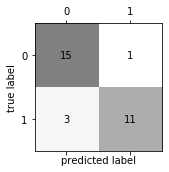

In [41]:
#low range of data so still in process

text_train, text_test, y_train, y_test = train_test_split(df["text"], df["satire"], 
    test_size=0.2)
vect = CountVectorizer(ngram_range=(1, 2),stop_words=None,lowercase=True,max_df=0.8, min_df=20)
tfidf = TfidfTransformer()
clf = LinearSVC(C=100.0)
pipe_lr = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
    ])
pipe_lr.fit(text_train, y_train)
print(len(vect.vocabulary_))

print('Test Accuracy: %.3f' % pipe_lr.score(text_test,y_test))
y_pred = pipe_lr.predict(text_test)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

In [20]:
from xgboost import XGBClassifier
modelxgb=XGBClassifier()
print(type(text_test))

text_test

<class 'pandas.core.series.Series'>


72     MINNESOTA (The Borowitz Report)—Psychologists ...
136    The campaign to rally support for Donald Trump...
70     Now that Donald Trump is President and is assu...
131    There were two notable Trumpworld headlines We...
81     President-elect Donald Trump escalated his rhe...
27     WASHINGTON (The Borowitz Report)—In an Oval Of...
68     Me: Mr. Trump, you have recently said that you...
106    Two years ago, Jonathan Clark was sending his ...
97     Kentucky Sen. Rand Paul gave an indication tod...
80     The Obama administration is preparing to annou...
77     Donald Trump appears to have not a clue how to...
43     FARMVILLE, VIRGINIA (The Borowitz Report)—The ...
84     President-elect Donald Trump took to Twitter M...
102    Two Senate Republicans joined demands for a bi...
22     RICHMOND, VA (SatireWire.com) – Donald Trump’s...
28     NEW YORK (The Borowitz Report)—A once-prominen...
135    The search warrant that authorized the FBI to ...
71     In light of the fact tha

In [35]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

# import category_encoders as ce
# # encode all features using ordinal encoding
# encoder_x = ce.OrdinalEncoder()
# X_encoded = encoder_x.fit_transform(X)

# # you'll need to use a different encoder for each dataframe
# encoder_y = ce.OrdinalEncoder()
# y_encoded = encoder_y.fit_transform(y)

# split encoded dataset
# X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded)
# text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [29]:
type(text_train)


pandas.core.frame.DataFrame

In [31]:
text_train=text_train.to_numpy()

In [43]:
#naive_bayes
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(text_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(text_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6666666666666666
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        16
           1       1.00      0.29      0.44        14

    accuracy                           0.67        30
   macro avg       0.81      0.64      0.60        30
weighted avg       0.79      0.67      0.61        30



In [44]:
###xbboost cant work directly with string we must  vectorize string first
# modelxgb.fit(text_train, y_train)
# print(len(vect.vocabulary_))

# print('Test Accuracy: %.3f' % modelxgb.score(text_test,y_test))
# y_pred = modelxgb.predict(text_test)
# print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
# print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
# print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# fig, ax = plt.subplots(figsize=(2.5, 2.5))
# ax.matshow(confmat, cmap='Greys', alpha=0.5)
# for i in range(confmat.shape[0]):
#     for j in range(confmat.shape[1]):
#         ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

# plt.xlabel('predicted label')
# plt.ylabel('true label')

# plt.tight_layout()
# plt.savefig('./confusion_matrix.png', dpi=300)
# plt.show()

In [46]:
dp1=pd.DataFrame({'title':y,'satire':1})
dpr1=pd.DataFrame({'title':yr,'satire':0})
df1 = pd.concat([dp1, dpr1], ignore_index=True)

In [46]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [17]:

# text_train, text_test, y_train, y_test = train_test_split(df1["title"], df1["satire"], 
#     test_size=0.2, random_state=42)
# vect = CountVectorizer(ngram_range=(1, 2),stop_words=None,lowercase=True,max_df=0.8, min_df=20)
# tfidf = TfidfTransformer()
# clf = LinearSVC(C=100.0)
# pipe_lr = Pipeline([
#     ('vect',vect),
#     ('tfidf',tfidf),
#     ('clf',clf)
#     ])
# pipe_lr.fit(text_train, y_train)

# print(len(vect.vocabulary_))

# print('Test Accuracy: %.3f' % pipe_lr.score(text_test,y_test))
# y_pred = pipe_lr.predict(text_test)
# print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
# print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
# print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# fig, ax = plt.subplots(figsize=(2.5, 2.5))
# ax.matshow(confmat, cmap='Greys', alpha=0.5)
# for i in range(confmat.shape[0]):
#     for j in range(confmat.shape[1]):
#         ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

# plt.xlabel('predicted label')
# plt.ylabel('true label')

# plt.tight_layout()
# plt.savefig('./confusion_matrix.png', dpi=300)
# plt.show()

In [21]:
def returndata(path,i):
    df=pd.read_csv(path)
    df["class"]=i
    return(df)

In [73]:
import sys
import string
def openfile(path):
    file= open(path, 'r')
    data = file.read().replace('\n', '')
    data=data.split("******")
#   clean(data)
    df=pd.DataFrame(data)
    df["class"]=0
    return df


In [65]:
df1=openfile("data/text/satire/satire_train.txt")
df2=openfile("data/text/satire/satire_test.txt")
df3=openfile("data/text/satire/satire_dev.txt")
df=pd.concat([df1,df2,df3])

In [66]:
df

,0,class
0,"CONCORD , NH After receiving "" subpar "" servic...",1
1,"MODESTO , CA Speaking with reporters before a ...",1
2,"PINE BLUFF , AR Lee Brandt , 11 , a fifth grad...",1
3,"GAHANNA , OH Talking about how fun it will be ...",1
4,"ORLANDO , FL Disgusted with the total childish...",1
...,...,...
3099,AFL CIO President Richard Trumka says Donald T...,1
3100,Presidential candidate Chris Christie took a f...,1
3101,"Brice Callaway , a wannabe muslim and who now ...",1
3102,Guess which jackass would LOSE money if Trump ...,1


In [74]:
df2=openfile("data/text/true/true_train_6.txt")


In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16879 entries, 0 to 16878
Data columns (total 2 columns):
0        16879 non-null object
class    16879 non-null int64
dtypes: int64(1), object(1)
memory usage: 263.9+ KB


In [76]:
df_row=pd.concat([df2,df])

In [80]:
df_row=df_row.sample(frac=1).reset_index(drop=True)

In [84]:
df[0]

0       CONCORD , NH After receiving " subpar " servic...
1       MODESTO , CA Speaking with reporters before a ...
2       PINE BLUFF , AR Lee Brandt , 11 , a fifth grad...
3       GAHANNA , OH Talking about how fun it will be ...
4       ORLANDO , FL Disgusted with the total childish...
                              ...                        
3099    AFL CIO President Richard Trumka says Donald T...
3100    Presidential candidate Chris Christie took a f...
3101    Brice Callaway , a wannabe muslim and who now ...
3102    Guess which jackass would LOSE money if Trump ...
3103                                                     
Name: 0, Length: 16252, dtype: object

In [87]:
#naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

X = df_row[0]
y = df_row["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)



nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8742001690208862
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4259
           1       0.86      0.88      0.87      4024

    accuracy                           0.87      8283
   macro avg       0.87      0.87      0.87      8283
weighted avg       0.87      0.87      0.87      8283



C:\Users\hedi\.conda\envs\factory619\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.8,
                                 max_features=None, min_df=20,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=50.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                   

44039
Test Accuracy: 0.948
Precision: 0.949
Recall: 0.945
F1: 0.947
[[3235  164]
 [ 179 3049]]


Text(0, 0, '3235')

Text(1, 0, '164')

Text(0, 1, '179')

Text(1, 1, '3049')

Text(0.5, 0, 'predicted label')

Text(0, 0.5, 'true label')

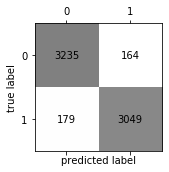

In [109]:
#low range of data so still in process

text_train, text_test, y_train, y_test = train_test_split(df_row[0], df_row["class"], 
    test_size=0.2)
vect = CountVectorizer(ngram_range=(1, 2),stop_words=None,lowercase=True,max_df=0.8, min_df=20)
tfidf = TfidfTransformer()
clf = LinearSVC(C=50.0)
pipe_lr = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
    ])
pipe_lr.fit(text_train, y_train)
print(len(vect.vocabulary_))

print('Test Accuracy: %.3f' % pipe_lr.score(text_test,y_test))
y_pred = pipe_lr.predict(text_test)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

In [110]:
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_row[0].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 192955 unique tokens.


In [111]:
from  keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df_row[0].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (33131, 250)


In [112]:
Y = pd.get_dummies(df_row['class']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (33131, 2)


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(29817, 250) (29817, 2)
(3314, 250) (3314, 2)


In [101]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
# import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [114]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
# model.add(Bidirectional(LSTM(100)))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 250

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 26835 samples, validate on 2982 samples
Epoch 1/5
26835/26835 [==============================] - 133s 5ms/step - loss: 0.4710 - accuracy: 0.7952 - val_loss: 0.3609 - val_accuracy: 0.8625
Epoch 2/5
26835/26835 [==============================] - 175s 7ms/step - loss: 0.2202 - accuracy: 0.9257 - val_loss: 0.2008 - val_accuracy: 0.9292
Epoch 3/5
26835/26835 [==============================] - 190s 7ms/step - loss: 0.1287 - accuracy: 0.9582 - val_loss: 0.2377 - val_accuracy: 0.9108
Epoch 4/5
26835/26835 [==============================] - 187s 7ms/step - loss: 0.0878 - accuracy: 0.9723 - val_loss: 0.2956 - val_accuracy: 0.8944
Epoch 5/5
26835/26835 [==============================] - 170s 6ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.3166 - val_accuracy: 0.9178


In [115]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


3314/3314 [==============================] - 4s 1ms/step
Test set
  Loss: 0.355
  Accuracy: 0.906


In [108]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df_row[0] = df_row[0].apply(clean_text)
# df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')